In [4]:
from ml_toolkit.data_handler import DataHandler
from ml_toolkit.feature_engineer import FeatureEngineer
from ml_toolkit.model_executor import ModelExecutor
from ml_toolkit.visualizer import Visualizer
import warnings
warnings.filterwarnings("ignore")

Loading raw data from pickle file: '../fin_data/GBP_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 128ms/step - accuracy: 0.4170 - loss: 1.1132 - val_accuracy: 0.0000e+00 - val_loss: 1.4056
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.5629 - loss: 0.9538 - val_accuracy: 0.8726 - val_loss: 0.7241
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7111 - loss: 0.7723 - val_accuracy: 0.8237 - val_loss: 0.6630
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7482 - loss: 0.7171 - val_accuracy: 0.7570 - val_loss: 0.7258
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7506 - loss: 0.6895 - val_accuracy: 0.8133 - val_loss: 0.5846
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.7661 - loss: 0.6580 - val_accuracy: 0.8889 - val_loss: 0.4994
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7707 - loss: 0.6445 - val_accuracy: 0.8267 - val_loss: 0.5898
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7621 - loss: 0.6505 - val_accuracy: 0.88

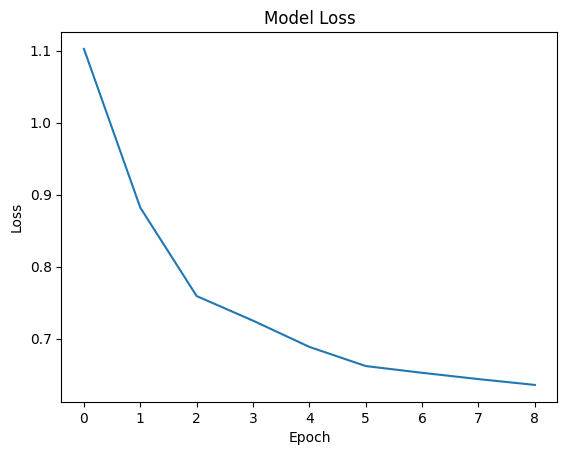

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step


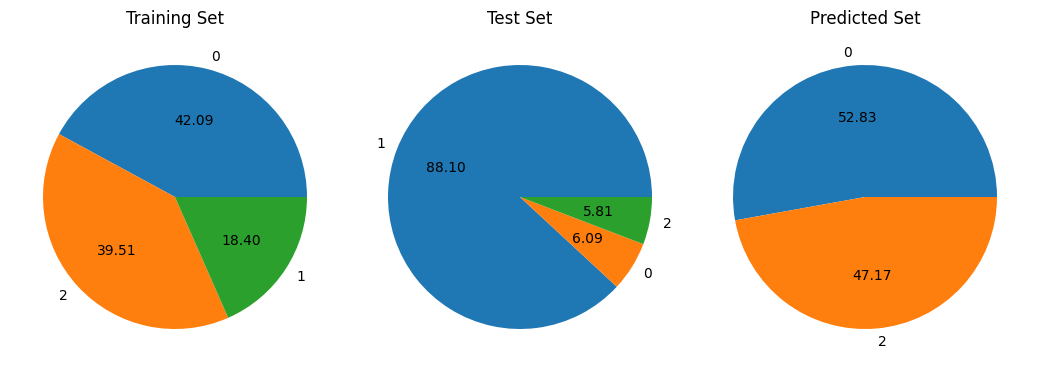

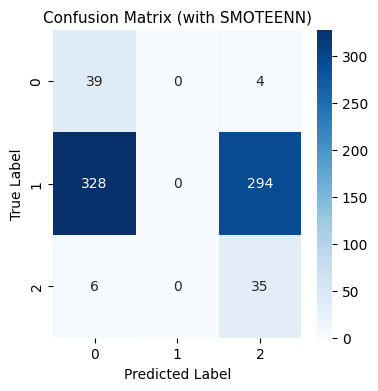

              precision    recall  f1-score   support

        Sell       0.10      0.91      0.19        43
     Neutral       0.00      0.00      0.00       622
         Buy       0.11      0.85      0.19        41

    accuracy                           0.10       706
   macro avg       0.07      0.59      0.12       706
weighted avg       0.01      0.10      0.02       706



Balanced training label distribution: Counter({0: 2839, 2: 2665, 1: 1241})
Minimum label in y_train: 0
Unique classes in y_train: [0 1 2]


Minimum label in y_test: 0
Test label distribution: Counter({1: 622, 0: 43, 2: 41})
Unique classes in y_test: [0 1 2]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Initial class weights: {0: 0.7731752087420993, 1: 0.047666941387097046, 2: 1.0}
Optimized Weights: {0: 0.7731752087420993, 1: 0.100000001, 2: 1.0}
Best accuracy score: 0.1048158640226629


In [5]:
model, mse, df, y_test, y_pred_classes, test_indices, label_encoder, optimized_class_weights, scaler_X  = ModelExecutor.execute_model(
                  file_path='../fin_data/GBP_USD_H4.pkl', 
                  start_date="2020-1-1", end_date="2024-07-29 21:00", test_size=0.1,
                  features = ['RSI', 'MACD', 'Volume'],
                  imbalance = True, imb_type = 'smote_enn',
                  model_type='Conv1D+GRU', model_style='Functional',
                  model_layers=5, units=64, dropout_rate=0.2,
                  learning_rate = 0.001, epochs=10, batch_size=32*10,
                  plot_type='test',forecast_period_min=60)

# AVAILABLE OPTIONS ------------------------------------------------------------------------------------------------
# features: ['Close', 'Volume', 'RSI', 'MACD']
# imb_type: 'smote', 'adasyn', 'random_oversampler', 'random_undersampler', 'tomek_links', 'nearmiss', 'smote_tomek', 'smote_enn'
# Model style: 'Sequential', 'Functional'
# Model type: 'LSTM', 'GRU', 'Conv1D', 'Transformer', 'Attention', or combinations like 'LSTM+Conv1D+Attention'. 'LSTM+GRU'
# Plot type: 'test', 'train', 'test+train', 'forecast'
# DEAFULTS: model_layers=3, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=10, batch_size=32*1
# You may want to under-train the model, e.g. epochs=3, batch_size=32 ------------------------------------------------

Loading raw data from pickle file: '../fin_data/GBP_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


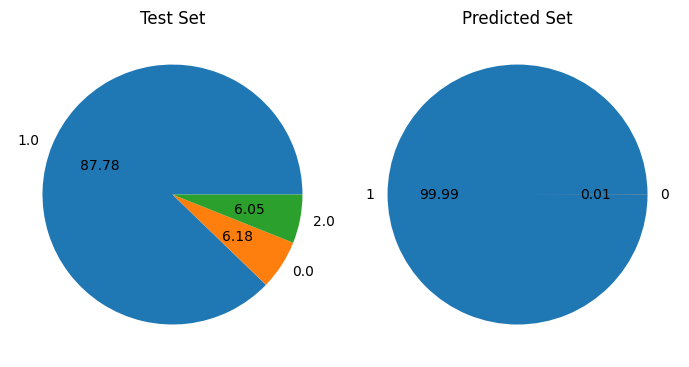

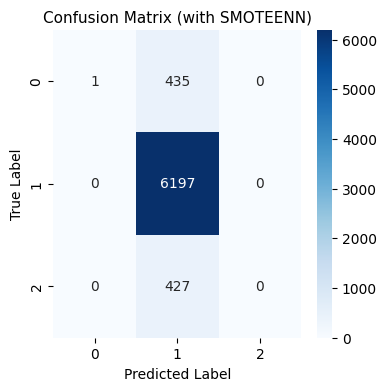

              precision    recall  f1-score   support

        Sell       1.00      0.00      0.00       436
     Neutral       0.88      1.00      0.93      6197
         Buy       0.00      0.00      0.00       427

    accuracy                           0.88      7060
   macro avg       0.63      0.33      0.31      7060
weighted avg       0.83      0.88      0.82      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 1]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [1 1 1 1 1]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.20000000000000007, 1: 3.0155555706333264, 2: 0.20000000000000007}
Best accuracy score: 0.8779036827195468


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


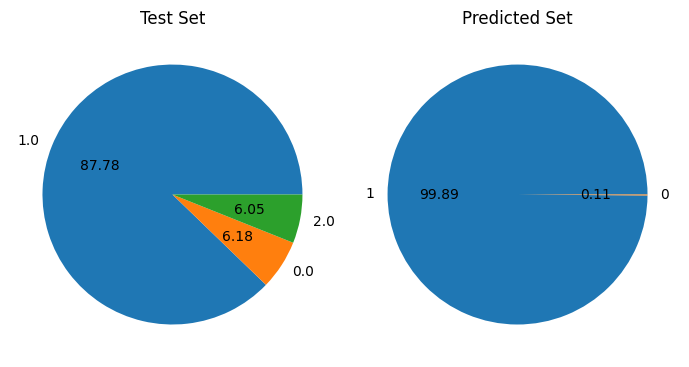

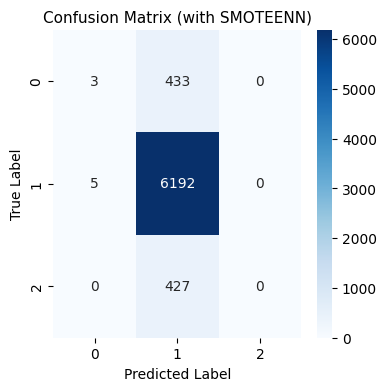

              precision    recall  f1-score   support

        Sell       0.38      0.01      0.01       436
     Neutral       0.88      1.00      0.93      6197
         Buy       0.00      0.00      0.00       427

    accuracy                           0.88      7060
   macro avg       0.42      0.34      0.32      7060
weighted avg       0.79      0.88      0.82      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 1]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [1 1 1 1 1]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 6.417573496057589, 1: 83.82688430437622, 2: 12.531598140502776}
Best accuracy score: 0.8774787535410765


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


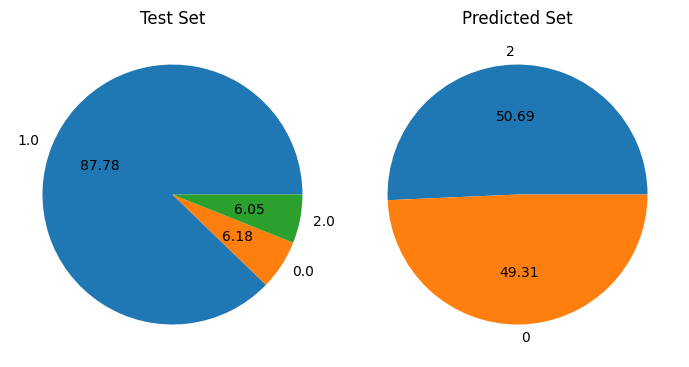

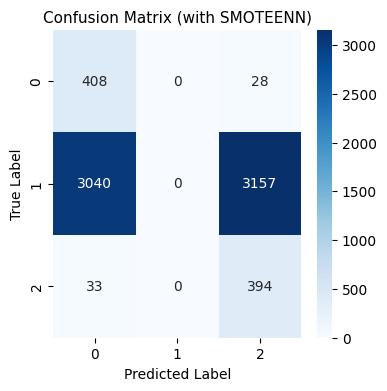

              precision    recall  f1-score   support

        Sell       0.12      0.94      0.21       436
     Neutral       0.00      0.00      0.00      6197
         Buy       0.11      0.92      0.20       427

    accuracy                           0.11      7060
   macro avg       0.08      0.62      0.14      7060
weighted avg       0.01      0.11      0.02      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.8558267531099218, 1: 0.200000001, 2: 1.0}
Best accuracy score: 0.11359773371104816


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


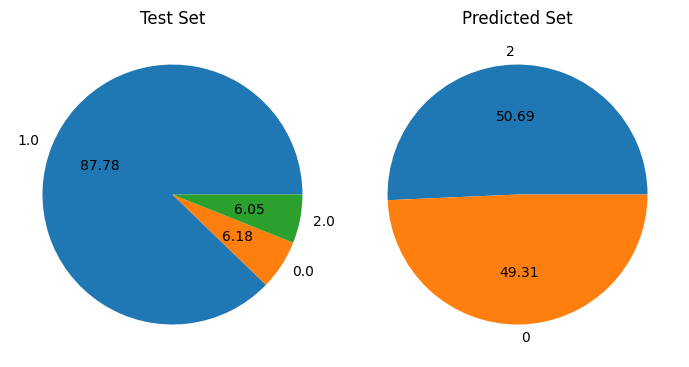

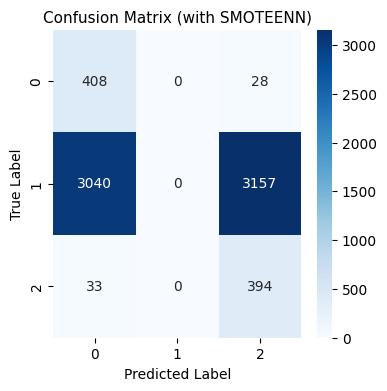

              precision    recall  f1-score   support

        Sell       0.12      0.94      0.21       436
     Neutral       0.00      0.00      0.00      6197
         Buy       0.11      0.92      0.20       427

    accuracy                           0.11      7060
   macro avg       0.08      0.62      0.14      7060
weighted avg       0.01      0.11      0.02      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.8558267531099218, 1: 0.200000001, 2: 1.0}
Best accuracy score: 0.11359773371104816


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


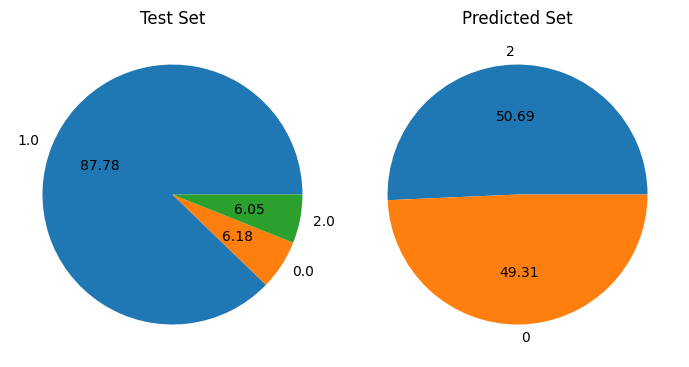

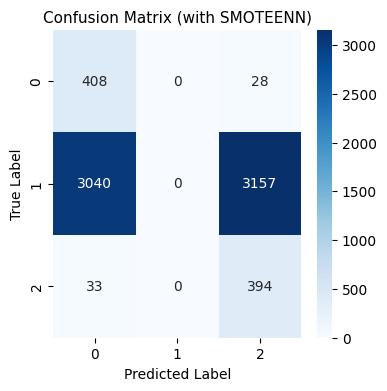

              precision    recall  f1-score   support

        Sell       0.12      0.94      0.21       436
     Neutral       0.00      0.00      0.00      6197
         Buy       0.11      0.92      0.20       427

    accuracy                           0.11      7060
   macro avg       0.08      0.62      0.14      7060
weighted avg       0.01      0.11      0.02      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.8558267531099218, 1: 0.200000001, 2: 1.0}
Best accuracy score: 0.11359773371104816


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


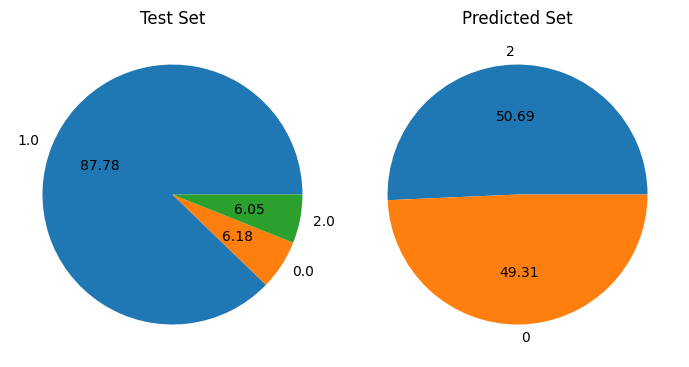

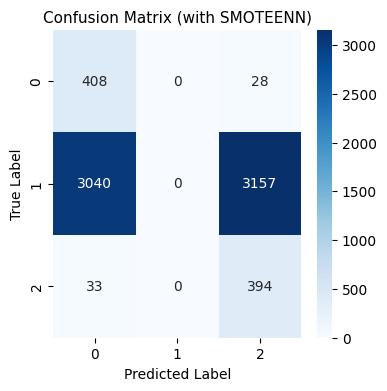

              precision    recall  f1-score   support

        Sell       0.12      0.94      0.21       436
     Neutral       0.00      0.00      0.00      6197
         Buy       0.11      0.92      0.20       427

    accuracy                           0.11      7060
   macro avg       0.08      0.62      0.14      7060
weighted avg       0.01      0.11      0.02      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.8558267531099233, 1: 0.20000000099999937, 2: 1.0}
Best accuracy score: 0.11359773371104816


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


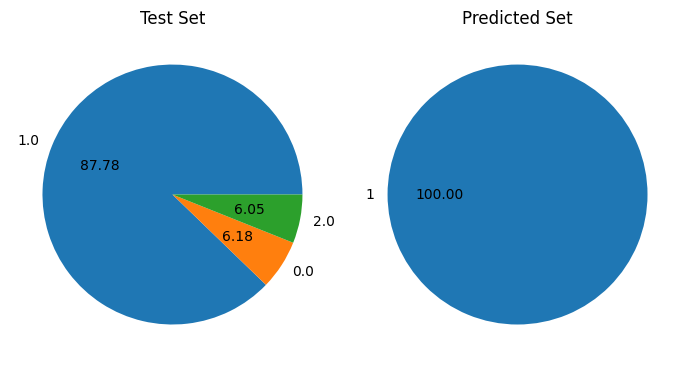

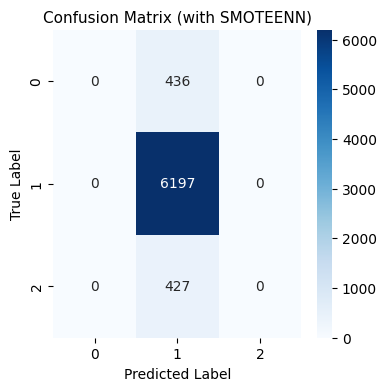

              precision    recall  f1-score   support

        Sell       0.00      0.00      0.00       436
     Neutral       0.88      1.00      0.93      6197
         Buy       0.00      0.00      0.00       427

    accuracy                           0.88      7060
   macro avg       0.29      0.33      0.31      7060
weighted avg       0.77      0.88      0.82      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [1]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [1 1 1 1 1]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.19999999999999973, 1: 3.4170240162801333, 2: 0.19999999999999998}
Best accuracy score: 0.8777620396600566


221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


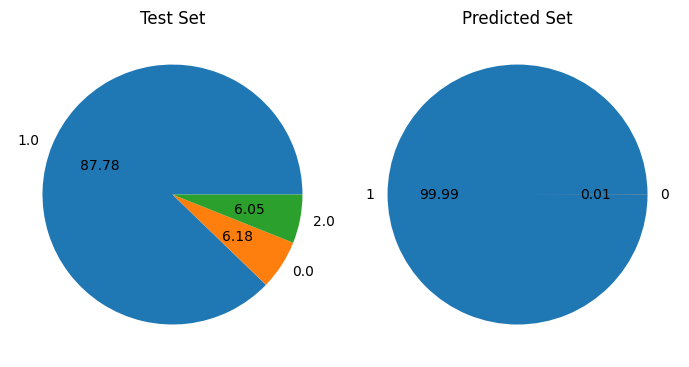

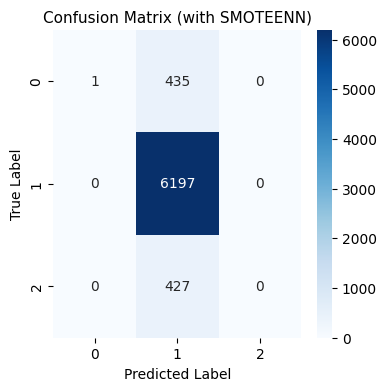

              precision    recall  f1-score   support

        Sell       1.00      0.00      0.00       436
     Neutral       0.88      1.00      0.93      6197
         Buy       0.00      0.00      0.00       427

    accuracy                           0.88      7060
   macro avg       0.63      0.33      0.31      7060
weighted avg       0.83      0.88      0.82      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 1]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [1 1 1 1 1]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.2517652473776738, 1: 3.7602104175608826, 2: 0.2}
Best accuracy score: 0.8779036827195468


221/221 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


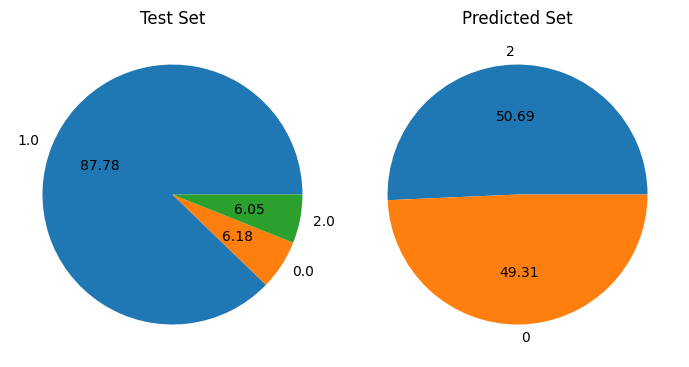

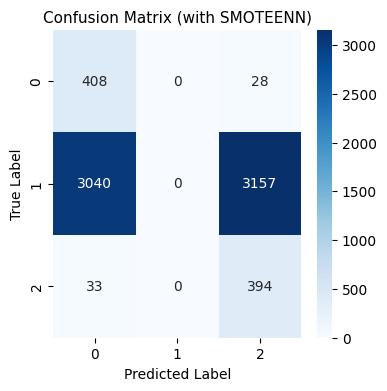

              precision    recall  f1-score   support

        Sell       0.12      0.94      0.21       436
     Neutral       0.00      0.00      0.00      6197
         Buy       0.11      0.92      0.20       427

    accuracy                           0.11      7060
   macro avg       0.08      0.62      0.14      7060
weighted avg       0.01      0.11      0.02      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 0.8558267531099218, 1: 0.200000001, 2: 1.0}
Best accuracy score: 0.11359773371104816


221/221 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


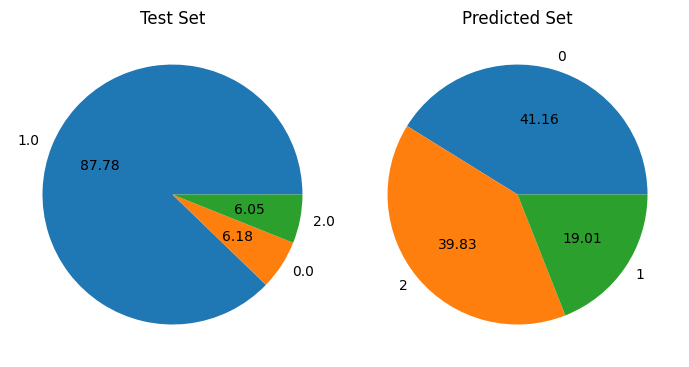

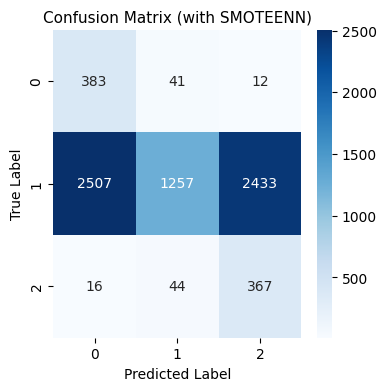

              precision    recall  f1-score   support

        Sell       0.13      0.88      0.23       436
     Neutral       0.94      0.20      0.33      6197
         Buy       0.13      0.86      0.23       427

    accuracy                           0.28      7060
   macro avg       0.40      0.65      0.26      7060
weighted avg       0.84      0.28      0.32      7060



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6197, 0.0: 436, 2.0: 427})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 1 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.714812   0.27754202 0.00764589]
 [0.7844263  0.2113347  0.00423894]
 [0.8030322  0.19345702 0.00351071]
 [0.8191726  0.17787682 0.00295034]
 [0.8459699  0.15187982 0.0021503 ]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.7731752087420993, 1: 5, 2: 1.0}
Initial class weights: {0: 0.8558267531099218, 1: 0.04946998983403044, 2: 1.0}
Optimized Weights: {0: 1.073248406538899, 1: 0.5767431192508553, 2: 1.1902839023457026}
Best accuracy score: 0.28427762039660054


In [6]:
file='../fin_data/GBP_USD_H4.pkl'
features = ['RSI', 'MACD', 'Volume']
start_date="2020-1-1"
end_date="2024-07-29 21:00"
optimization_methods = ['Nelder-Mead', 'Powell', 'CG',
                        'BFGS','L-BFGS-B','TNC', 
                        'COBYLA' ,'COBYQA','SLSQP' ,'trust-constr']

# Load the data
df = DataHandler.load_data(file, start_date, end_date)

# Feature Engineering
df, time, X, y = FeatureEngineer.add_features(df=df, features=features)

# # Iterate over optimization methods
for method in optimization_methods:
    # Header
    Visualizer.print_hline_with_background(f"Optimization: method {method}", font_size="20px", color="#2464b3", background_color="#daeb94")
    # Method
    y_pred_reconstructed, accuracy, precision, recall, f1, confusion, mse, rmse = \
        ModelExecutor.scale_predict_data(model=model, class_weights=optimized_class_weights, scaler_X=scaler_X, 
                        label_encoder=label_encoder, X_test=X, y_test=y, plot=False, 
                        optimization_method=method)